In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 5.1.1 1차원 확률변수의 정의

- 확률질량함수
 - 확률은 변수가 취할 수 있는 값 x를 인수로 하는 함수로 볼 수 있음.
 - f(x) -> 확률질량함수, 확률함수
 - 확률변수가 취할 수 있는 값과 그 확률의 구체적 대응 -> 확률분포

In [2]:
x_set = np.array([1,2,3,4,5,6])

불공정한 주사위만들기

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
X = [x_set,f] # 확률변수 X정의

확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 곧 확률분포!

In [5]:
# 확률 p_k 구한다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

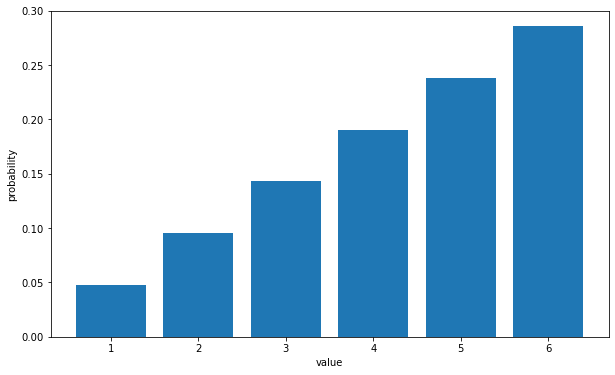

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

- 확률의 성질
 - 절대적으로 0 이상
 - 모두 더하면 1

In [7]:
np.all(prob>=0)

True

np.all 은 모든 요소가 참일 때만 참을 반환하는 함수

In [8]:
np.sum(prob)

0.9999999999999999

- 누적분포함수(CDF): 확률변수X가 x 이하가 될 때의 확률을 반환하는 함수

In [9]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [10]:
F(3)

0.2857142857142857

- 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한것 과 같은 것 -> 확률변수를 표준화할 때 중요함.
 - 2X+3을 확률변수 Y라고 하면, Y 확률분포는 다음과 같다.

In [11]:
y_set = np.array([2 * x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 5.1.2 1차원 이산형 확률변수의 지표
1차원 데이터에도 평균과 분산이 있듯이, 1차원 확률변수에서도 평균과 분산이라는 지표를 정의 가능

- 기댓값
 - 확률변수의 평균이란 확률변수를 몇 번이나 (무제한으로) 시행하여 얻어진 실현값의 평균을 가르킨다.
 - 주사위라면 무한 번 주사위를 굴려 얻는 눈의 평균
 - 이산형 확률변수의 경우, 확률변수의 평균은 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의된다.
    > 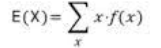
 - 확률변수의 평균은 기댓값이라고 불린다.

In [12]:
# 불공정 주사위의 기댓값을 앞에서 정의한 대로 계산
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

100만번 주사위를 굴려보자.

In [13]:
sample = np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.33207

정의한 대로 계산한 기댓값과 일치한다.

확률변수 X를 2X+3으로 변환한 확률변수 Y의 기댓값에 관해 생각해보자.
- X의 함수 g(X)의 기댓값으로 정의

In [14]:
def E(X, g = lambda x:x):
    x_set, f= X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [15]:
E(X)

4.333333333333333

확률변수 Y = 2X+3의 기댓값은 다음과 같이 계산 가능

In [16]:
E(X,g = lambda x: 2*x+3)

11.666666666666664

기댓값에는 다음과 같은 선형성이라는 성질이 있음.
- E(aX + b) = aE(X) + b

In [17]:
2* E(X)+ 3

11.666666666666666

- 분산
 - 확률변수의 분산도 데이터의 분산과 마찬가지로 산포도를 나타내는 지표가 됨.
 > 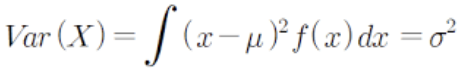

불공정한 주사위의 분산 구하기

In [34]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

변환한 확률변수에 애해서도 분산을 정의할 수 있음.

#### 이산형 확률변수의 분산

In [48]:
def V(X,g = lambda x:x):
    x_set, f =X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [49]:
V(X)

2.2222222222222223

확률변수 Y = 2X +3의 분산은 다음과 같이 계산이 가능함

In [50]:
V(X, lambda x: 2*x+3)

8.88888888888889

a,b를 실수, X를 확률변수라고 하면 
> $$V(aX+b) =a^2V(X)$$

성립한다

In [54]:
2**2 * V(X)

8.88888888888889